# Prediccion de Precio de las Personas que Gastan en su plan mensual en relación si son foraneo y trabajan
## Integrantes: 
* Antonio Ortegón
* Eduardo Fraire
* Luis Ordoñez

### Problema: 
Predecir si las personas gastan más en su plan o no con relación si son foraneos/locales y trabajan/gastan. 

## Objetivos:
* Predecir el precio de cuanto gastan las personas en su plan mediante caracteristicas cualitativas y cuantitativas. 
### Objetivos especifios: 
* Determinar las variables cuantitatvas y cualitativas.
* Analizar como afectan estás variables
* Contruir un modelo de regresión lineal

### Modelo

$$ p(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$


$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

### Variables

- Local/foraneo

- Trabajas/Estudias

- Dinero gastado



### Referencia: 

https://docs.google.com/spreadsheets/d/1z5sQumrR2Z9MfKzzrTDadXGgvxA7VEt7vJoLZfjL9BU/edit?gid=246560197#gid=246560197

### Resolocuión mediante python

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy import stats
from scipy.stats import norm
datos=pd.read_csv("Foraneos VS Locales.csv")
datos

,Marca temporal,EU\n,L/F,E/T,Años,Mometos,Afecta,Razones,Reaccion,Cambios,Dinero,Veces,Sueño,Cargas,Tiempo p,Tempio RM
0,5/29/2024 12:56:01,Si,Local,Solo estudio,18,Cuando estoy en mi casa,No,"Buscar algo en internet, ver mis redes sociale...","Ninguna, no me causa ningún problema",Cuando veo mis redes no estar tanto tiempo vie...,200,7,0,2,60,01:30
1,5/29/2024 13:09:35,Si,Local,Solo estudio,20,En la noche,Si,Ocio y procrastinación,Me aburro,Dejar de verlo como un medio de salir de mi ab...,200,35,2,2,60,01:30
2,5/29/2024 13:09:36,Si,Local,Solo estudio,19,En mis tiempos libres,No,Redes sociales,No me molesta,Tal vez usarlo un poco menos,150,250,2,1,15,05:30
3,5/29/2024 16:15:14,Si,Local,Solo estudio,18,Tardes,Si,Entretenimiento,Ninguna,Disminuirlo,390,15,2,3,0,3
4,5/29/2024 17:47:48,Si,Foráneo,Solo estudio,24,En la noche,Si,Por entretenimiento y comunicación,Ninguna,El sonido,200,25,2,1,120,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,06/03/2024 21:14,Si,Local,Trabajo y estudio,19,En las mañanas,Si,Redes sociales como Instagram y medios de comu...,No me gusta me siento mal,Dejarlo de usar con fines de procrastinación,150,200,2,1,0,1
96,06/03/2024 22:17,Si,Local,Trabajo y estudio,19,Noche,No,Tiempo libre y aburrimiento,Me da más o menos igual,No usarlo tan seguido,120,20,2,1,120,01:30
97,06/03/2024 22:50,Si,Local,Trabajo y estudio,19,Todo el dia,Si,Vida social trabajo y escuela,Me pongo nervioso tio,Cambiar al iphone 15,500,250,4,1,190,8
98,06/04/2024 15:12,Si,Local,Trabajo y estudio,19,en mis tiempos libres,Si,me entretengo con él,"me da un poco de ansiedad, pero nada grave","ninguno, estoy a gusto",400,250,0,1,290,3


In [99]:
datos.head()

,Marca temporal,EU\n,L/F,E/T,Años,Mometos,Afecta,Razones,Reaccion,Cambios,Dinero,Veces,Sueño,Cargas,Tiempo p,Tempio RM
0,5/29/2024 12:56:01,Si,Local,Solo estudio,18,Cuando estoy en mi casa,No,"Buscar algo en internet, ver mis redes sociale...","Ninguna, no me causa ningún problema",Cuando veo mis redes no estar tanto tiempo vie...,200,7,0,2,60,01:30
1,5/29/2024 13:09:35,Si,Local,Solo estudio,20,En la noche,Si,Ocio y procrastinación,Me aburro,Dejar de verlo como un medio de salir de mi ab...,200,35,2,2,60,01:30
2,5/29/2024 13:09:36,Si,Local,Solo estudio,19,En mis tiempos libres,No,Redes sociales,No me molesta,Tal vez usarlo un poco menos,150,250,2,1,15,05:30
3,5/29/2024 16:15:14,Si,Local,Solo estudio,18,Tardes,Si,Entretenimiento,Ninguna,Disminuirlo,390,15,2,3,0,3
4,5/29/2024 17:47:48,Si,Foráneo,Solo estudio,24,En la noche,Si,Por entretenimiento y comunicación,Ninguna,El sonido,200,25,2,1,120,7


In [101]:
datos.describe()

,Años,Veces,Sueño,Cargas,Tiempo p
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,19.120000,110.940000,1.800000,1.550000,113.33000
std,1.485825,94.253882,1.128152,0.657129,91.32969
min,18.000000,6.000000,0.000000,1.000000,0.00000
25%,18.000000,23.750000,1.000000,1.000000,30.00000
50%,19.000000,65.000000,2.000000,1.000000,102.50000
75%,19.000000,200.000000,2.250000,2.000000,180.00000
max,25.000000,260.000000,4.000000,3.000000,360.00000


In [103]:
datos["L/F"]=datos["L/F"].astype("category")
datos["E/T"]=datos["E/T"].astype("category")
datos["L/F"], datos["E/T"]

(0       Local
 1       Local
 2       Local
 3       Local
 4     Foráneo
        ...   
 95      Local
 96      Local
 97      Local
 98      Local
 99      Local
 Name: L/F, Length: 100, dtype: category
 Categories (2, object): ['Foráneo', 'Local'],
 0          Solo estudio
 1          Solo estudio
 2          Solo estudio
 3          Solo estudio
 4          Solo estudio
             ...        
 95    Trabajo y estudio
 96    Trabajo y estudio
 97    Trabajo y estudio
 98    Trabajo y estudio
 99    Trabajo y estudio
 Name: E/T, Length: 100, dtype: category
 Categories (2, object): ['Solo estudio', 'Trabajo y estudio'])

## Ver profe si ocupa caja de bigotes y gráfica de dispersión

In [107]:
y=datos["EU\n"]=="Si"
x=datos["L/F"]

### Gráfico de dispersón Dinero Vs L/F

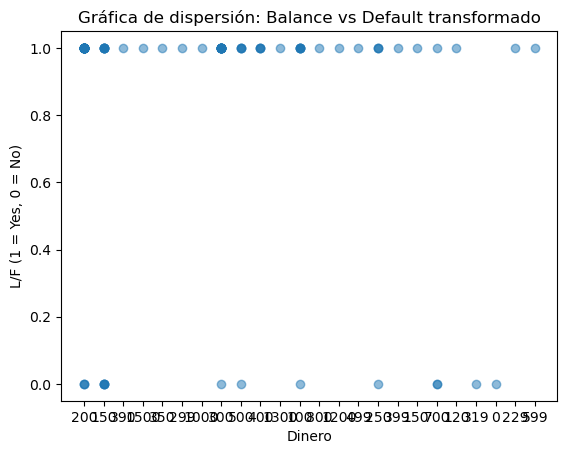

In [110]:
# Transformar la columna 'default' en valores numéricos
datos['L/F_num'] = datos['L/F'].map({'Local': 1, 'Foráneo': 0})

# Crear la gráfica de dispersión
plt.scatter(datos['Dinero'], datos['L/F_num'], alpha=0.5)

# Etiquetas y título
plt.title('Gráfica de dispersión: Balance vs Default transformado')
plt.xlabel('Dinero')
plt.ylabel('L/F (1 = Yes, 0 = No)')

# Mostrar la gráfica
plt.show()


### Gráfico de dispersón Dinero Vs T/E

In [113]:
y=datos["EU\n"]=="Si"
x=datos["E/T"]

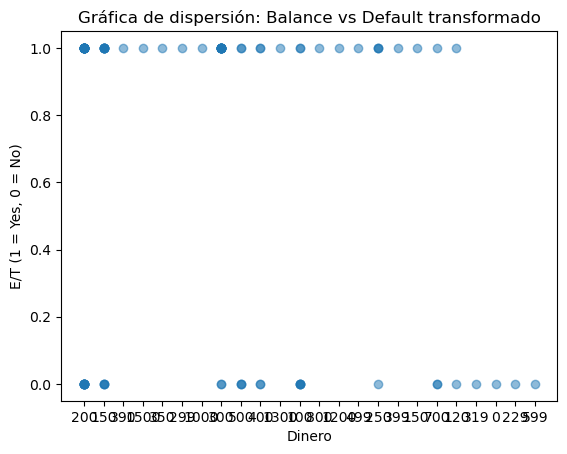

In [115]:
# Transformar la columna 'default' en valores numéricos
datos['E/T_num'] = datos['E/T'].map({'Solo estudio': 1, 'Trabajo y estudio': 0})

# Crear la gráfica de dispersión
plt.scatter(datos['Dinero'], datos['E/T_num'], alpha=0.5)

# Etiquetas y título
plt.title('Gráfica de dispersión: Balance vs Default transformado')
plt.xlabel('Dinero')
plt.ylabel('E/T (1 = Yes, 0 = No)')

# Mostrar la gráfica
plt.show()

### Generar valores

In [118]:
n=len(y)
ones=np.ones([n, 1])
E=np.reshape(datos["E/T_num"], [n, 1])
L=np.reshape(datos["L/F_num"], [n, 1])
X=np.hstack((ones, L, E))
y_vector=np.reshape(y, [n, 1])
def predi(beta, X): 
    return 1/(1+np.exp(-X@beta))
def J(beta, X, y):
    epi=1e-10
    n, p=X.shape
    beta=np.reshape(beta, [p, 1])
    y_pred=predi(beta,X)
    e=y*np.log(y_pred+epi)+(1-y)*np.log(1-y_pred+epi)
    return -np.sum(e)

beta=[0, 0, 0]
rrs=opt.minimize(J, beta, args=(X, y_vector))
rrs

  message: NaN result encountered.
  success: False
   status: 3
      fun: nan
        x: [ 0.000e+00  0.000e+00  0.000e+00]
      nit: 0
      jac: [       nan        nan        nan]
 hess_inv: [[1 0 0]
            [0 1 0]
            [0 0 1]]
     nfev: 4
     njev: 1

In [120]:
pre=predi(rrs.x, X)
p=pre*(1-pre)
V=np.diagflat(p)
cov = np.linalg.inv(X.T @ V @ X)
se = np.sqrt(np.diag(cov))
este=rrs.x/se
p_v=2 * (1 - norm.cdf(abs(este)))